1.3


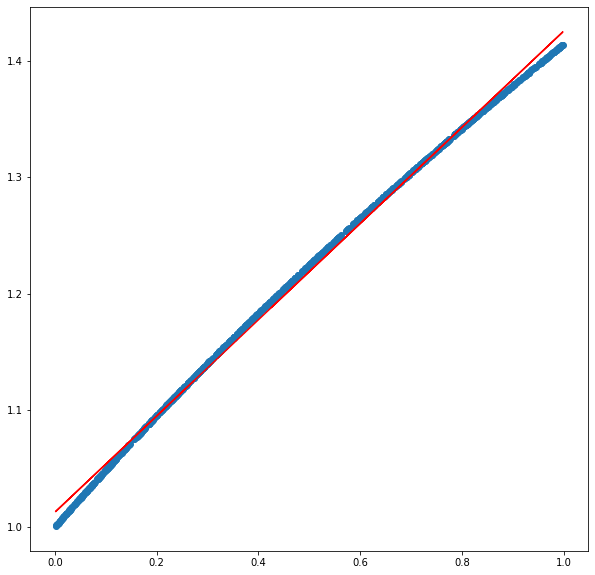

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

X = np.random.rand(1000)
y = (X+1)**0.5

class Linear_Regression(): # for one variable functions
  w = 1
  b = 1
  run = False
  def __init__(self,X,y):
    self.X = X
    self.y = y
  

  def __loss(self,w,b):
    n = len(self.X)
    l = 0
    for i in range(n):
      l+= ((w*self.X[i]+b)-self.y[i])**2
    l/=n
    return l
  
  def __GradientDesent(self,lr,n):
    for i in range(n): 
      self.w = self.w - lr*(self.__loss(self.w+0.0001,self.b)-self.__loss(self.w,self.b))/0.0001
      self.b = self.b - lr*(self.__loss(self.w,self.b+0.0001)-self.__loss(self.w,self.b))/0.0001
  
  def fit(self,learningrate=0.5,iter=1000):
    self.__GradientDesent(learningrate,iter)
    plt.plot(self.X,self.w*self.X+self.b,'r',label = 'my method')
    plt.scatter(self.X,self.y)
    
    self.run = True 
  def predict(self,x):
    return round(self.w*x+self.b,2)

mod = Linear_Regression(X,y)
mod.fit(0.6,500)
print(mod.predict(0.69))

w1 = mod.w
b1 = mod.b

[0.41254047] 1.0126171824498091


<function matplotlib.pyplot.show>

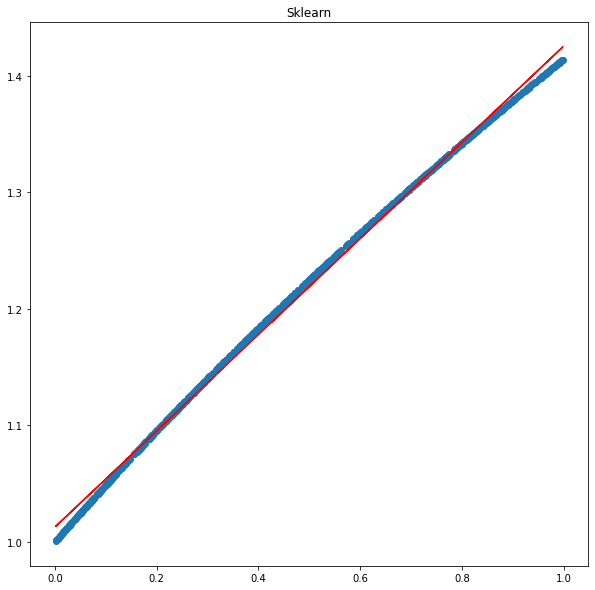

In [ ]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(10,10))
model = LinearRegression()
model.fit(X.reshape((-1, 1)),y)
w2,b2 = model.coef_,model.intercept_
plt.plot(X,w2*X+b2,color = 'r')
plt.scatter(X,y)
plt.title("Sklearn")
print(w2,b2)
plt.show

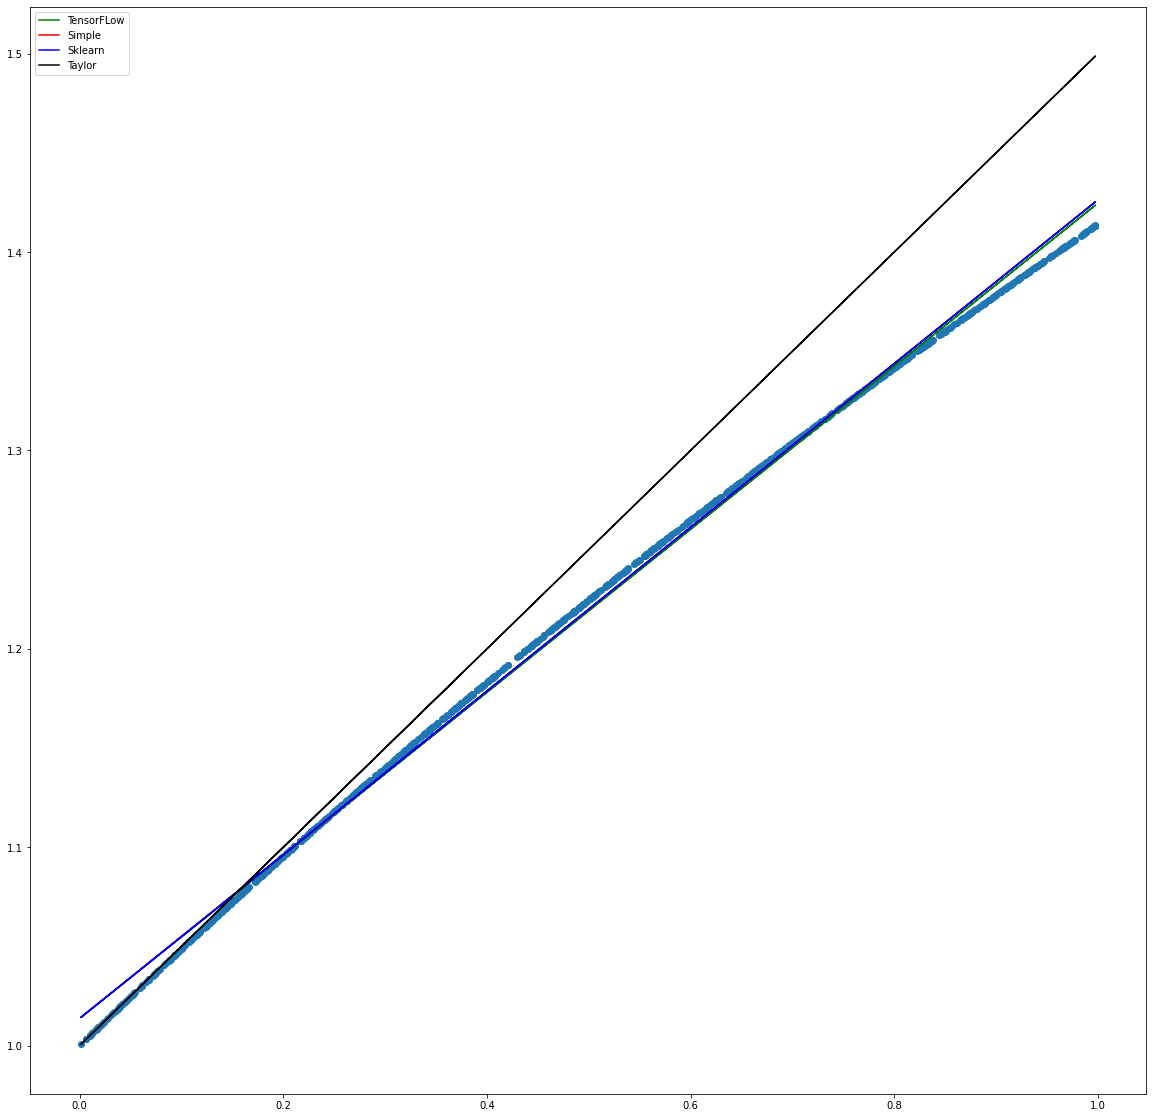

In [ ]:
import tensorflow as tf

X = tf.random.uniform(shape=(1000,))
w = tf.Variable(1.0)
b = tf.Variable(tf.random.uniform(shape=(1,)))
y = (X+1)**0.5
lrate = 0.5

plt.figure(figsize=(20,20))
for i in range(500):
  with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape:
      loss = tf.reduce_sum(tf.square((w*X+b)-y))
      loss /= 1000
  grad_w = tape.gradient(loss,w)
  grad_b = tape2.gradient(loss,b)
  new_w = w - lrate*grad_w
  new_b = b - lrate*grad_b
  w.assign(new_w)
  b.assign(new_b)


y2 = 1+X/2

plt.scatter(X,y)

plt.plot(X,w*X+b,'g',label ='TensorFLow')
plt.plot(X,w1*X+b,'r',label = 'Simple')
plt.plot(X,w2*X+b,'b',label = 'Sklearn')
plt.plot(X,y2,'k',label = "Taylor")
plt.legend()

plt.show()